<a href="https://colab.research.google.com/github/powderflask/cap-comp215/blob/main/examples/simpleSIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Simplified pandemic modelling using susceptible-infected-removed (SIR) framework

References: https://www.mdpi.com/2227-7390/9/9/932/htm, https://journals.plos.org/plosone/article?id=10.1371/journal.pone.0246961

In the model each individual is considered to be in one of the three possible types: susceptible (S), infected (I), or recovered (R). The individuals and their connections are modeled as a graph. Each node of the graph represents an individual. Two nodes are connected if the individuals interact with each other. The modeling is done over a fixed period with the following rules of transmission.

The rules of disease transmission:

 

*   All nodes in the network were initially set to be in the susceptible (S)state.

* Randomly, the state of one node was changed to the infected (I) state, representing "patient zero". 

* Thereafter, at each time point, the infected node(I) can infect any of their neighbouring susceptible nodes, changing their state from S to I with a fixed probability.

* This transmission can only occur during the time the person is infectious. After that the node is classified as recovered (R) and cannot be infected or infect others. 


In the code the labels are added to the nodes as follows: 


*   0 - node suseptible
*   -1 - node recovered
*   any other number represents the number of days till the node stops being infectious 



In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib import animation, rc, colors


In [ ]:
#parameters for simulation
NUM_INDIVIDUALS = 50
AVERAGE_NUMBER_OF_CONNECTIONS = 4 #I think that this is true if one chooses p = 0.5 in watts_strogatz_graph function call
DAYS_INFECTIOUS = 5
PROB_INFECTION = 0.15

COLOUR_INFECTIOUS ='red'
COLOUR_SUSCEPTIBLE = 'pink'
COLOUR_RECOVERED = 'green'

Create a randomm watts_strogatz_graph and randomly choose patient 0. Generate the appropriate labels and colours for the vertices.

The final product is in the last cell. The rest are just steps that can be used while teaching.

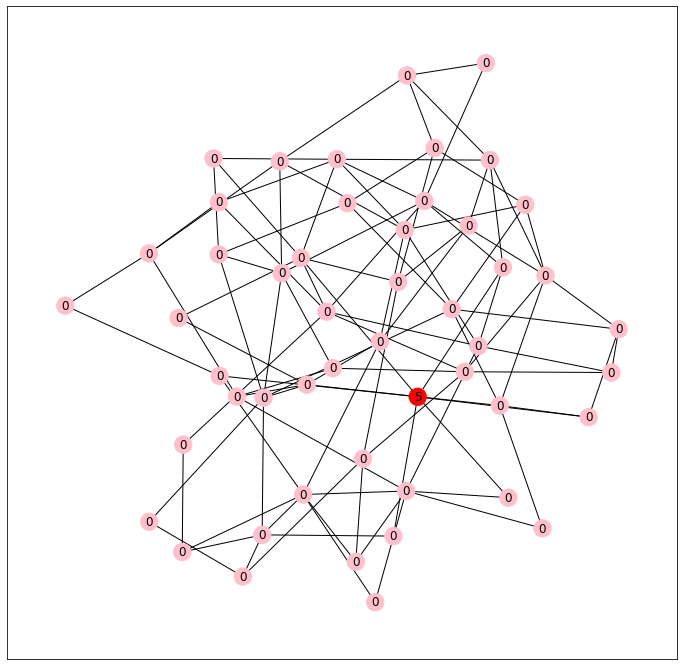

In [ ]:
G = nx.watts_strogatz_graph(n = NUM_INDIVIDUALS, k = AVERAGE_NUMBER_OF_CONNECTIONS, p = 0.5)

labels = dict.fromkeys(range(0,NUM_INDIVIDUALS), 0)

nx.set_node_attributes(G, labels, "labels")
  
colourMap = [COLOUR_SUSCEPTIBLE] * NUM_INDIVIDUALS

firstInfected = np.random.randint(0,NUM_INDIVIDUALS) #overkill, but consistent with the book's flip function
colourMap[firstInfected] = COLOUR_INFECTIOUS
labels[firstInfected] = DAYS_INFECTIOUS


plt.figure(figsize = (12, 12))
nx.draw_networkx(G, node_color=colourMap, labels=labels)

In [ ]:
#from the textbook
def flip(p):
  return np.random.random() < p

The cell below can be run over and over again to understand the simulation (but I prefer teh animatin below)

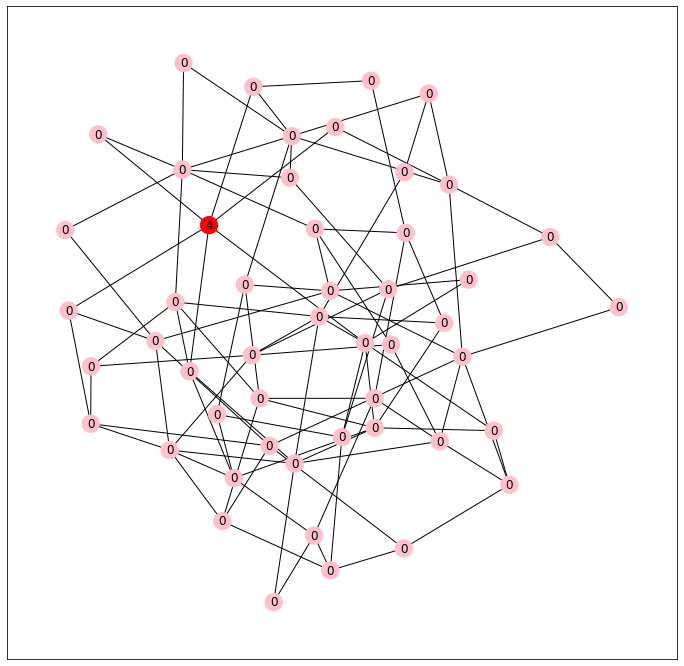

In [ ]:

newLabels = dict.fromkeys(range(0,NUM_INDIVIDUALS), 0)
for key in labels:
  if labels[key] == -1:
      newLabels[key] = -1

for node in G.nodes():
  if labels[node] > 0:
    #node infectious - try infecting the neighbours
    for neighbour in G.neighbors(node):
      if labels[neighbour] == 0 and flip(PROB_INFECTION):
        newLabels[neighbour] = DAYS_INFECTIOUS
        colourMap[neighbour] = COLOUR_INFECTIOUS

    #set the node label to -1 meaning the node cannot be infected any more if this is the last day of the infectious period
    #else subtract 1 from the node's infectious period
    if labels[node] == 1:
      newLabels[node] = -1
      colourMap[node] = COLOUR_RECOVERED
    else:
      newLabels[node] = labels[node] - 1


labels = newLabels
        
plt.figure(figsize = (12, 12))
nx.draw_networkx(G, node_color=colourMap, labels=labels)


Below is the final product, but it should be polished.

In [ ]:
def timeStep(num, n, layout, G, ax):
  ax.clear()
  labels = nx.get_node_attributes(G,"labels")

  #I couldn't get the frame 0 to display in animation. I tried using the init function, but couldn't figure it out.
  if num > 0:

    #could be much more efficient - (R)ecovered nodes don't need to be looked at for example
    #a function to update the graph should be here and then this code could easily be reused
    newLabels = dict.fromkeys(range(0,NUM_INDIVIDUALS), 0)
    for key in labels:
      if labels[key] == -1:
        newLabels[key] = -1

    for node in G.nodes():
      if labels[node] > 0:
      #node infectious - try infecting the neighbours
        for neighbour in G.neighbors(node):
          if labels[neighbour] == 0 and flip(PROB_INFECTION):
            newLabels[neighbour] = DAYS_INFECTIOUS
            colourMap[neighbour] = COLOUR_INFECTIOUS

        #set the node label to -1 (meaning the node cannot be infected any more) if this is the last day of the infectious period
        #else subtract 1 from the node's infectious period
        if labels[node] == 1:
          newLabels[node] = -1
          colourMap[node] = COLOUR_RECOVERED
        else:
          newLabels[node] = labels[node] - 1

    labels = newLabels
    nx.set_node_attributes(G, newLabels, "labels")

    ax.set_title("Time {}".format(num))
  else:
    ax.set_title("Time 0")
  nx.draw(G, pos=layout, node_color=colourMap, ax=ax,labels=labels)


def init():
  ax.clear()
  nx.draw(G, pos=layout, node_color=colourMap, ax=ax,labels=labels)
  ax.set_title("Time 0")
  return fig


# Build plot
fig, ax = plt.subplots(figsize=(8,6))

# Create a graph and layout

G = nx.watts_strogatz_graph(n = NUM_INDIVIDUALS, k = AVERAGE_NUMBER_OF_CONNECTIONS, p = 0.5)

labels = dict.fromkeys(range(0,NUM_INDIVIDUALS), 0)
  
colourMap = [COLOUR_SUSCEPTIBLE] * NUM_INDIVIDUALS

firstInfected = np.random.randint(0,NUM_INDIVIDUALS) #overkill, but consistent with the book's flip function
colourMap[firstInfected] = COLOUR_INFECTIOUS
labels[firstInfected] = DAYS_INFECTIOUS

nx.set_node_attributes(G, labels, "labels")

layout = nx.spring_layout(G)

ani = animation.FuncAnimation(fig,  timeStep, init_func=init, frames=50, fargs=(NUM_INDIVIDUALS, layout, G, ax))
plt.close()

rc('animation', html='jshtml')
ani